In [1]:
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')

## Возьмем рандомную выборку со средним 50 и СКО (стандартное отклонение) 1, взятую из какой-то генеральной совокупности

Для этого будем использовать функцию rnorm(), с которой мы уже познакомились.

Как мы помним, у нормального распределения есть два параметр: мат. ожидание и дисперсия

Для функции norm.rvs требуется среднее и СКО:

In [25]:
mu = 50
std = 1
values = norm.rvs(size=10,loc=mu,scale=std)

sample_data = pd.DataFrame({"values": values})

In [3]:
sample_data

,values
0,48.653409
1,51.109360
2,52.230870
3,50.041893
4,50.333332
5,51.173303
6,48.686776
7,49.744121
8,51.045085
9,47.606069


## Визуализируем с помощью гистограммы и заметим, что распределение отличается от нормального

Text(0, 0.5, 'count')

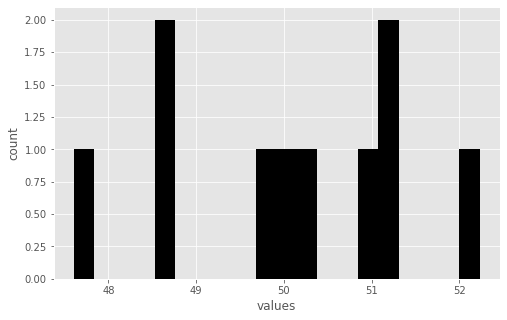

In [4]:
viz = sample_data["values"].plot(kind="hist", color="black", figsize=(8,5), bins=20)
viz.set_xlabel("values")
viz.set_ylabel("count")

По маленьким выборкам сложно определить, из какого распределения они взяты. 

Чем больше выборка, тем больше она будет обретать форму нормального распределения
(которое имеет генеральная совокупность)

## Возьмём выборку объёма mu, 100, 1000 и 10000 с теми же параметрами распределения:

In [26]:
sample_data_for_comparison = pd.DataFrame()

In [27]:
sizes = [10, 50, 100, 1000, 10000]

values = []
simulation_groups = []

for sample_size in sizes:
    
    vals = norm.rvs(size=sample_size, loc=mu, scale=std)
    values.extend(vals)
    
    group = [sample_size for i in range(sample_size)]
    simulation_groups.extend(group)

sample_data_for_comparison["values"] = values
sample_data_for_comparison["simulation_group"] = simulation_groups

In [28]:
sample_data_for_comparison.tail()

,values,simulation_group
11155,49.942877,10000
11156,50.591613,10000
11157,51.463243,10000
11158,50.050676,10000
11159,50.342832,10000


## Визуализируем с помощью гистограммы и сравним


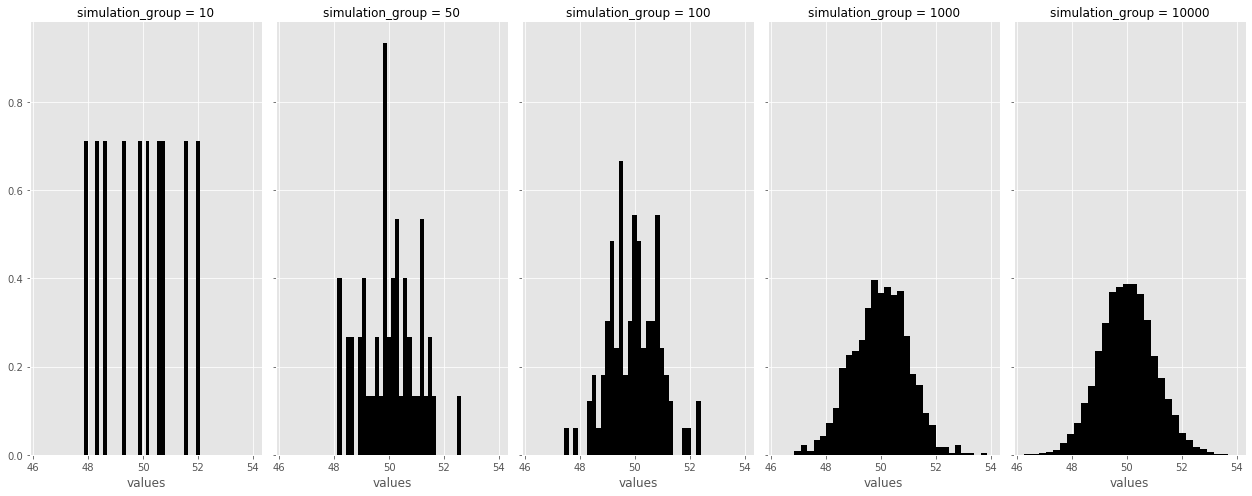

In [23]:
g = sns.FacetGrid(sample_data_for_comparison, col="simulation_group", height=7, aspect=.5)
g.map(plt.hist, "values", bins=30, density=True, color="black")

С увеличением размера выборки ее распределение становится более похожим на нормальное, то есть на то распределение, из которого она взята.
## Теперь посмотрим на выборочные средние:

In [24]:
sample_data_for_comparison.groupby("simulation_group", as_index=False)["values"].agg({"mean":"mean"})

,simulation_group,mean
0,10,49.893265
1,50,50.006726
2,100,49.944754
3,1000,49.982047
4,10000,50.009223


С увеличением размера выборки, среднее значение выборки становится таким же, как среднее ГС

Так мы познакомились с Законом больших чисел